In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pickle
import re

import evaluation

import pandas as pd


/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/
max t4t frac:  0.62
mean t4t frac:  0.5056666666666666
std t4t frac:  0.05919928678249051
/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/
max t4t frac:  0.6
mean t4t frac:  0.49966666666666676
std t4t frac:  0.052566360176658826


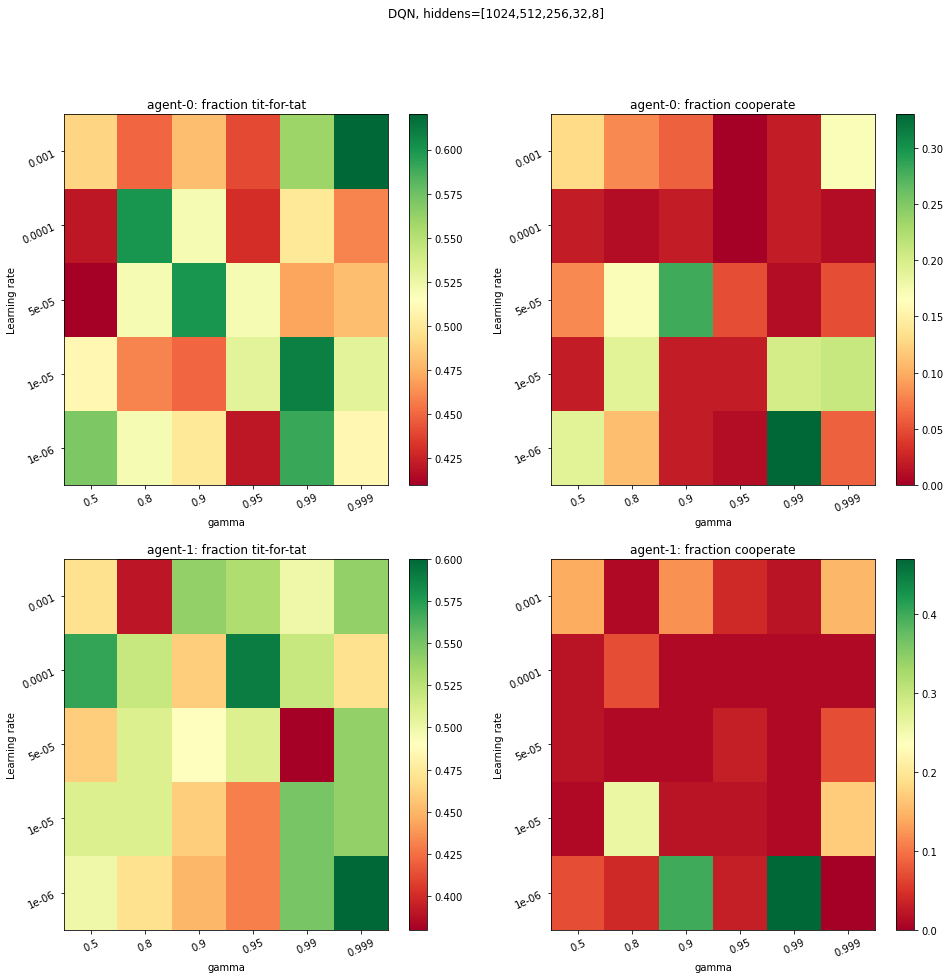

In [8]:
# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
# exp_dirs = ['MA_DQN2/']
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/MA_DQN1/',
            '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/']
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/']
exp_dir = exp_dirs[0]
titles= ['DQN, hiddens=[1024,512,256,32,8]']

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(exp_dir + 'data_save')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(16,15))

    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlGn');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate')
        plt.xlabel('gamma')
        plt.title(f'agent-{ii}: fraction tit-for-tat')
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlGn');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate')
        plt.xlabel('gamma')
        plt.title(f'agent-{ii}: fraction cooperate')
        plt.suptitle(titles[dir_num])
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


0
MA_PPO2/
max t4t frac:  0.61
mean t4t frac:  0.503
std t4t frac:  0.05814636704042653
1
MA_PPO2/
max t4t frac:  0.68
mean t4t frac:  0.5076666666666667
std t4t frac:  0.07319760166077091


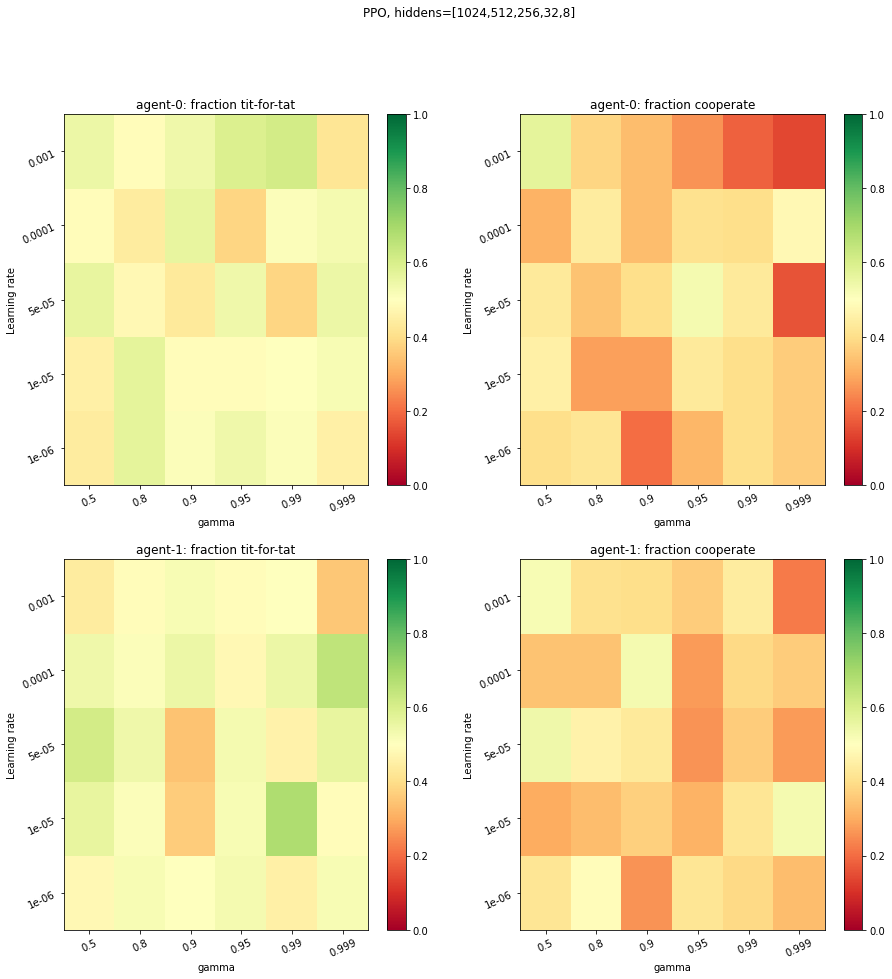

In [4]:
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dirs = ['MA_PPO2/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
# exp_dirs = ['MA_PPO1/']

exp_dir = exp_dirs[0]

titles= ['PPO, hiddens=[1024,512,256,32,8]']

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(15,15))

    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlGn');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate')
        plt.xlabel('gamma')
        plt.title(f'agent-{ii}: fraction tit-for-tat')
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlGn');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate')
        plt.xlabel('gamma')
        plt.title(f'agent-{ii}: fraction cooperate')
        plt.suptitle(titles[dir_num])
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))
